In [1]:
import qiskit

## Question 1

In [5]:
qasmCode = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
x q[0];
h q[0];
sdg q[0];
"""
qc = qiskit.QuantumCircuit.from_qasm_str(qasmCode)
qc.draw()



## Question 2

In [4]:
qasmCode = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

x q[0];
h q[0];
sdg q[0];
measure q[0] -> c[0];
"""
qc = qiskit.QuantumCircuit.from_qasm_str(qasmCode)
qc.draw()


## Question 3

q_0 is a qubit, and c_0 is a classical bit. Not really sure the point of this question...

## Question 4

In [8]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.h(qr[0])
circuit.sdg(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw()

## Question 5

In [11]:
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.h(qr[0])
circuit.sdg(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])
circuit.draw()

## Question 6

You can just reverese in reverse order of how the gates are applied.

SO XXYSZTS+HHTS|"+"> can be reversed by the following sequence of gates:

S+T+HHST+ZS+YXX

## Question 7

In [14]:
qr = qiskit.QuantumRegister(2)
circuit = qiskit.QuantumCircuit(qr)
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])
circuit.draw()

## Question 8

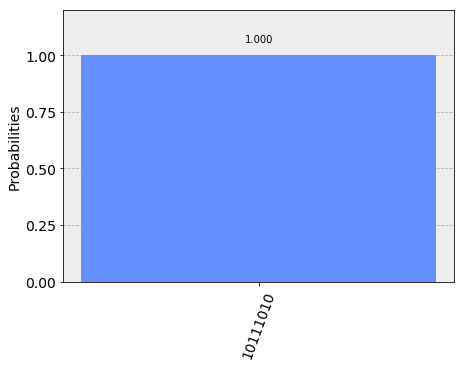

In [20]:
qiskit.IBMQ.load_accounts()
backend = qiskit.IBMQ.backends("ibmq_qasm_simulator")[0]
qr = qiskit.QuantumRegister(8)
cr = qiskit.ClassicalRegister(8)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.x(qr[3])
circuit.x(qr[4])
circuit.x(qr[5])
circuit.x(qr[7])
#My computation
circuit.h(qr[0])
circuit.sdg(qr[0])
circuit.cx(qr[0], qr[1])
#Reversing it
circuit.cx(qr[0], qr[1])
circuit.s(qr[0])
circuit.h(qr[0])
#Measuring
circuit.measure(qr, cr)
job_exp = qiskit.execute(circuit, backend=backend)
from qiskit.tools.visualization import plot_histogram
plot_histogram(job_exp.result().get_counts(circuit))